In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Nadam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from datetime import datetime

In [22]:
df1 = pd.read_csv("Updated_Houses.csv", encoding = "utf-8")

In [23]:
df1.head

<bound method NDFrame.head of        district      city  floor       price  rooms     sq  year  \
0       Mokotów  Warszawa      2  1925000.00      2  71.00  2008   
1      Grunwald    Poznań      3   459000.00      2  43.39  1900   
2      Grunwald    Poznań      2   459000.00      2  43.38  1900   
3      Grunwald    Poznań      3   880000.00      3  91.88  1900   
4      Grunwald    Poznań      3   880000.00      3  91.88  1900   
...         ...       ...    ...         ...    ...    ...   ...   
37602      Wola  Warszawa      2   749541.60      2  45.24  2021   
37603   Mokotów  Warszawa      9  1300077.00      4  73.50  2021   
37604    Bemowo  Warszawa      0   857034.00      3  53.00  2010   
37605    Włochy  Warszawa      4  1321866.00      3  71.00  2017   
37606   Ursynów  Warszawa      2   878532.48      3  63.00  1978   

       price_per_sq update_date  \
0          27113.00  2024-07-04   
1          10578.00  2024-07-04   
2          10581.00  2024-07-04   
3           9

In [24]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sq)
        st = np.std(subdf.price_per_sq)
        reduced_df = subdf[(subdf.price_per_sq>(m-st)) & (subdf.price_per_sq <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df2 = remove_outliers(df1)

In [25]:
df2.shape

(29885, 10)

In [26]:
df2.isnull().sum()

district            0
city                0
floor               0
price               0
rooms               0
sq                  0
year                0
price_per_sq        0
update_date         0
offer_url       16681
dtype: int64

In [27]:
print(f'Krk:{len(df2[df2.city == "Kraków"].district.unique())}')
print(f'WWa:{len(df2[df2.city == "Warszawa"].district.unique())}')
print(f'Pzn:{len(df2[df2.city == "Poznań"].district.unique())}')

Krk:18
WWa:18
Pzn:5


In [28]:
districts = np.sort(df2[(df2.city == "Kraków")].district.unique())

In [29]:
districts

array(['Bieńczyce', 'Bieżanów-Prokocim', 'Bronowice', 'Czyżyny',
       'Dębniki', 'Grzegórzki', 'Krowodrza', 'Mistrzejowice', 'Nowa Huta',
       'Podgórze', 'Podgórze Duchackie', 'Prądnik Biały',
       'Prądnik Czerwony', 'Stare Miasto', 'Swoszowice',
       'Wzgórza Krzesławickie', 'Zwierzyniec', 'Łagiewniki-Borek Fałęcki'],
      dtype=object)

In [30]:
dummies = pd.get_dummies(df2.city)
df3 = pd.concat([df2,dummies],axis='columns')
df3.head(4)

,district,city,floor,price,rooms,sq,year,price_per_sq,update_date,offer_url,Kraków,Poznań,Warszawa
0,Prądnik Biały,Kraków,4,749000.0,2,42.01,2023,17829.0,2024-07-04,https://www.otodom.pl/pl/oferta/2-pokoje-widok...,True,False,False
1,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/wyjatkowe-mies...,True,False,False
2,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,True,False,False
3,Podgórze Duchackie,Kraków,8,655000.0,2,36.50,2023,17945.0,2024-07-04,https://www.otodom.pl/pl/oferta/gotowe-dwustro...,True,False,False


In [31]:
dummies = pd.get_dummies(df2.district)
df3 = pd.concat([df3,dummies],axis='columns')
df3.head(4)

,district,city,floor,price,rooms,sq,year,price_per_sq,update_date,offer_url,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,Prądnik Biały,Kraków,4,749000.0,2,42.01,2023,17829.0,2024-07-04,https://www.otodom.pl/pl/oferta/2-pokoje-widok...,...,False,False,False,False,False,False,False,False,False,False
1,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/wyjatkowe-mies...,...,False,False,False,False,False,False,False,False,False,False
2,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,...,False,False,False,False,False,False,False,False,False,False
3,Podgórze Duchackie,Kraków,8,655000.0,2,36.50,2023,17945.0,2024-07-04,https://www.otodom.pl/pl/oferta/gotowe-dwustro...,...,False,False,False,False,False,False,False,False,False,False


In [32]:
X = df3.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns

In [33]:
y = df3.price

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [35]:
# Ustawienie wszystkich wag na 1
weights = [1 for i in range(len(X_train.columns))]

temp_weights = weights.copy()
samples_splited_by_weight = []

min_weight = 3
max_weight = 9
# Ustawienie zakresu wag dla testów
for weight_value in range(min_weight, max_weight+1, 1):
    # Nazwy próbek
    # Tu można dodawać swoje propozycje. Żeby nie testować wszystkich, można zakomentować niepotrzebne
    # Jako klucz podaje się zbiór próbek oddzielonych '_', a jako wartość wagi
    sample_names = {
        "Cities": [weight_value], 
        "Districts": [weight_value], 
        "Params": [weight_value],
        "Params_Cities1": [weight_value-1, weight_value+1], 
        "Params_Districts1": [weight_value-1, weight_value+1], 
        "Cities_Districts1": [weight_value-1, weight_value+1],
        "Params_Cities2": [weight_value+1, weight_value-1], 
        "Params_Districts2": [weight_value+1, weight_value-1], 
        "Cities_Districts2": [weight_value+1, weight_value-1],
        "Sq": [weight_value],
        "Rooms": [weight_value],
        "Floor": [weight_value],
        "Year": [weight_value],
        "Sq_Districts1": [weight_value-1, weight_value+1],
        "Sq_Districts2": [weight_value+1, weight_value-1],
        "Sq_Cities1": [weight_value-1, weight_value+1],
        "Sq_Cities2": [weight_value+1, weight_value-1],
        "Year_Districts1": [weight_value-1, weight_value+1],
        "Year_Districts2": [weight_value+1, weight_value-1],
        "Year_Cities1": [weight_value-1, weight_value+1],
        "Year_Cities2": [weight_value+1, weight_value-1],
    }
    samples_splited_by_weight.append(sample_names)

sample_names_keys = list(samples_splited_by_weight[0].keys())

def change_weight(column_name, new_weight):
    index = np.where(X.columns==column_name)[0][0]
    weights[index] = new_weight

# Próbka dla wyższych wag miast
def cities_sample(weight_value):
    for city in ["Kraków", "Warszawa","Poznań"]:
        change_weight(city, weight_value) 

# Próbka dla wyższych wag dzielnic
def districts_sample(weight_value):
    for index in range(7, len(X.columns)):
        weights[index] = weight_value   

# Próbka dla wyższych wag parametrów
def params_sample(weight_value):
    for index in range(0, 4):
        weights[index] = weight_value

# Próbka dla wyższej wagi wybranego parametru
def param_sample(weight_value, param_name):
    index = np.where(X.columns==param_name)[0][0]
    weights[index] = weight_value

In [36]:
X_train.shape[1]

47

In [37]:
# Najelpiej prosperujące wagi

sample_names = {
        "Year_Cities1": [8, 10],
        "Year_Districts1": [5, 7],
        "Year_Cities2": [10, 8],
        "Year_Cities2": [8, 6],
        "Year": [8],
        "Year_Districts2": [3, 1],
        "Year_Districts2": [10, 8],
        "Params_Cities2": [8, 6],
        "Cities": [8],
        "Year_Cities2": [4, 2],
    }
sample_names_keys = list(sample_names.keys())

samples_splited_by_weight = [
    sample_names
]

In [60]:
import re

def keep_letters(input_string):
    return re.sub(r'[^a-zA-Z]', '', input_string)
    
weighted_weights = []
for sample_names in samples_splited_by_weight:  
    weights_samples = []
    sample_names_keys = list(sample_names.keys())
    for name, weight in sample_names.items():
        samples = name.split("_")
        for i, sample in enumerate(samples):
            if "Params" in sample:
                params_sample(weight[i])
            elif "Districts" in sample:
                districts_sample(weight[i])
            elif "Cities" in sample:
                cities_sample(weight[i])
            else:
                param_sample(weight[i], keep_letters(sample.lower()))
        param_sample(0.1, "rooms")   
        weights_samples.append(weights)
        weights = temp_weights.copy()
        
    weighted_weights.append(weights_samples)

In [61]:
test_weights = np.array(weights) 
test_sample_weights = np.dot(X_train, test_weights)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [63]:
print("Mean of scaled training data:", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled training data:", X_train_scaled.std(axis=0))


Mean of scaled training data: [-4.07162267e-17 -4.16078229e-17  2.86499581e-16 -1.58763564e-15
  4.57686052e-17  1.22297279e-16  1.54543342e-17 -1.84263216e-17
  6.41949268e-17 -8.32156458e-18  1.60487317e-17 -5.79537533e-17
 -2.49646937e-17 -1.78319241e-18  4.16078229e-18 -9.86699800e-17
 -1.42655393e-17  9.51035952e-18  3.26918609e-17 -5.08209837e-17
  4.16078229e-17  2.49646937e-17  8.12838540e-17  4.45798103e-17
 -6.98417027e-17  2.67478862e-17  4.99293875e-17  3.95274318e-17
  6.24117344e-18 -3.95274318e-17 -9.51035952e-18  5.55761635e-17
 -2.37758988e-18 -1.54543342e-17 -4.75517976e-17  5.23069774e-17
 -3.09086684e-17  1.11449526e-17 -2.85310786e-17 -3.15030659e-17
 -3.20974634e-17  6.53837217e-18  7.84604661e-17 -5.46845672e-17
 -2.43702963e-17  5.05237850e-18 -1.54543342e-17]
Standard deviation of scaled training data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
weighted_weights[0][0]

[1,
 0.1,
 1,
 8,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [65]:
from datetime import datetime

# Można sobie testować włączając True. Dla tego zestawu robi się to parę godzin
weights_experiments = True 

# Ustawiamy, czy chcemy mieć przeskalowane dane // ogółem to wyniki są słabsze
scaled_data = True
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

#weights = [1 for i in range(len(X_train.columns))]

if scaled_data:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    

if weights_experiments:
    results = {}
    w = min_weight
    reps = 5
    # Ilość powtórzeń dla modeli o tych samych wagach dla dokładniejszych wyników
    for weights_samples in weighted_weights: 
        for ww in range(len(weighted_weights[0])):
            results[sample_names_keys[ww]] = 0

        current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        with open("results.txt", "a", encoding="utf-8") as file:
            file.write(f"\n\n=== Wyniki dla wywołania z danymi {'przeskalowanymi' if scaled_data else 'nieprzeskalowanymi'} z ")
            file.write(current_time)
            file.write(" ===\n")
            
        for i, current_weights in enumerate(weights_samples):
            for rep in range(reps):
                print(f'weight {w}/{max_weight}, sample {i}/{len(weights_samples)-1}')
                current_weights = np.array(current_weights) 
                sample_weights = np.dot(X_train, current_weights)
                sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)
                
                # Definicja modelu artificial neural network
                join_model = Sequential([
                    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                    Dense(32, activation='relu'),
                    Dense(1) 
                ])
                # Kompilowanie modelu
                
                join_model.compile(optimizer=Nadam(), loss='mean_squared_error', metrics=['mse', 'mae'])
                
                # Trenowanie modelu
                history = join_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)
                
                test_loss, test_mse, test_mae = join_model.evaluate(X_test_scaled, y_test)
                
                # Sprawdzanie wyniku modelu
                y_pred = join_model.predict(X_test_scaled)
                
                r2 = r2_score(y_test, y_pred)
                results[sample_names_keys[i]] += r2
            with open("results.txt", "a", encoding="utf-8") as file:
                file.write(f"{sample_names_keys[i]} {samples_splited_by_weight[w-min_weight][sample_names_keys[i]]}: {results[sample_names_keys[i]]/reps}\n")     
            print(results)
 
        w += 1 

weight 3/9, sample 0/6
Epoch 1/100


C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 15735361086947328.0000 - mae: 882652.8750 - mse: 977023467520.0000 - val_loss: 15448985552551936.0000 - val_mae: 876096.5000 - val_mse: 959988629504.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15455199296487424.0000 - mae: 874245.5625 - mse: 959487148032.0000 - val_loss: 14380857250807808.0000 - val_mae: 843686.0000 - val_mse: 893542531072.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14122291629654016.0000 - mae: 834539.3125 - mse: 877108133888.0000 - val_loss: 12129337683738624.0000 - val_mae: 770639.2500 - val_mse: 753490526208.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11727082857955328.0000 - mae: 751881.8125 - mse: 727875584000.0000 - val_loss: 9094344141176832.0000 - val_mae: 656858.1875 - val_mse: 564764016640.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8697674383491072.0000 - mae: 626758.5625 - mse: 538728235008.0000 - val_loss: 60794569511403

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 16001592150982656.0000 - mae: 888495.0000 - mse: 993621573632.0000 - val_loss: 15448506663698432.0000 - val_mae: 876120.4375 - val_mse: 959961104384.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15778019775873024.0000 - mae: 874973.5000 - mse: 978944524288.0000 - val_loss: 14379660028674048.0000 - val_mae: 843586.6250 - val_mse: 893482106880.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14405914090012672.0000 - mae: 836263.5625 - mse: 893983784960.0000 - val_loss: 12105311636684800.0000 - val_mae: 769660.6875 - val_mse: 752028745728.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11724926784372736.0000 - mae: 749795.8125 - mse: 727398481920.0000 - val_loss: 9024786072076288.0000 - val_mae: 654033.6875 - val_mse: 560493297664.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8689306176585728.0000 - mae: 628256.9375 - mse: 538866483200.0000 - val_loss: 59266194661703

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - loss: 15787741434347520.0000 - mae: 883656.7500 - mse: 979958956032.0000 - val_loss: 15487892587544576.0000 - val_mae: 877232.6875 - val_mse: 962411036672.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15957640676900864.0000 - mae: 879929.6250 - mse: 990350540800.0000 - val_loss: 14686295997546496.0000 - val_mae: 852606.6875 - val_mse: 912554917888.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14766489479413760.0000 - mae: 848438.4375 - mse: 916381171712.0000 - val_loss: 12920551190298624.0000 - val_mae: 795996.6250 - val_mse: 802727067648.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12289201735204864.0000 - mae: 773777.5625 - mse: 762905034752.0000 - val_loss: 10343739390164992.0000 - val_mae: 704755.8750 - val_mse: 642480209920.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9980095246630912.0000 - mae: 678869.8750 - mse: 618772430848.0000 - val_loss: 749564134948

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 15764890060849152.0000 - mae: 883624.1875 - mse: 978869288960.0000 - val_loss: 15512432956932096.0000 - val_mae: 878086.3125 - val_mse: 963936256000.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15543411482296320.0000 - mae: 874873.1875 - mse: 964519591936.0000 - val_loss: 14824068884725760.0000 - val_mae: 857495.1250 - val_mse: 921119621120.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14594596298293248.0000 - mae: 848137.1875 - mse: 906095099904.0000 - val_loss: 13281296230907904.0000 - val_mae: 809589.0000 - val_mse: 825158270976.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13460162291433472.0000 - mae: 803744.4375 - mse: 835082256384.0000 - val_loss: 11041946453671936.0000 - val_mae: 733250.0000 - val_mse: 685887651840.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10767603270156288.0000 - mae: 713475.3750 - mse: 667633057792.0000 - val_loss: 

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16168819923877888.0000 - mae: 886001.2500 - mse: 1002956062720.0000 - val_loss: 15465865847767040.0000 - val_mae: 876649.3750 - val_mse: 961034321920.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16225253646663680.0000 - mae: 879641.5000 - mse: 1005373554688.0000 - val_loss: 14483997669195776.0000 - val_mae: 846863.2500 - val_mse: 899925540864.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14056549638995968.0000 - mae: 833104.9375 - mse: 872686944256.0000 - val_loss: 12331586619965440.0000 - val_mae: 777784.5000 - val_mse: 765995581440.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11968762815184896.0000 - mae: 758643.1250 - mse: 742418874368.0000 - val_loss: 9454463190302720.0000 - val_mae: 671404.6250 - val_mse: 587044356096.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8947224868290560.0000 - mae: 639995.0000 - mse: 554700963840.0000 - val_loss: 648017847359

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10062175292882944.0000 - mae: 882402.5000 - mse: 994462466048.0000 - val_loss: 9694601254273024.0000 - val_mae: 876349.7500 - val_mse: 960440631296.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10042041559941120.0000 - mae: 879965.5625 - mse: 992571359232.0000 - val_loss: 9071613026762752.0000 - val_mae: 846147.1875 - val_mse: 898644967424.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9193700693377024.0000 - mae: 840920.0625 - mse: 908742230016.0000 - val_loss: 7749046030565376.0000 - val_mae: 778021.5000 - val_mse: 767458017280.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7451535256584192.0000 - mae: 756137.3750 - mse: 736972439552.0000 - val_loss: 5913775366471680.0000 - val_mae: 670432.7500 - val_mse: 585476014080.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5713499967717376.0000 - mae: 640330.1875 - mse: 563248234496.0000 - val_loss: 4022007

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9750245776818176.0000 - mae: 882223.3125 - mse: 965809274880.0000 - val_loss: 9676857670631424.0000 - val_mae: 875565.3125 - val_mse: 958676860928.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9819344284418048.0000 - mae: 880730.1250 - mse: 972349636608.0000 - val_loss: 8965848383356928.0000 - val_mae: 841293.6250 - val_mse: 888140267520.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8856871641284608.0000 - mae: 828513.0000 - mse: 875723751424.0000 - val_loss: 7480170877288448.0000 - val_mae: 763810.8750 - val_mse: 740768677888.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7229049508200448.0000 - mae: 741132.6250 - mse: 714173644800.0000 - val_loss: 5510195543277568.0000 - val_mae: 643642.0000 - val_mse: 545453998080.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5390299920596992.0000 - mae: 611851.0000 - mse: 531124289536.0000 - val_loss: 3592377218367488.0000

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9893679430893568.0000 - mae: 881090.0625 - mse: 979553943552.0000 - val_loss: 9662013189914624.0000 - val_mae: 874719.8125 - val_mse: 957206364160.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9895266421309440.0000 - mae: 876515.3125 - mse: 978103894016.0000 - val_loss: 8838031767240704.0000 - val_mae: 834131.7500 - val_mse: 875465277440.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8618132662910976.0000 - mae: 817530.5000 - mse: 852114341888.0000 - val_loss: 7115437422673920.0000 - val_mae: 741861.9375 - val_mse: 704608206848.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6664513638105088.0000 - mae: 712560.6250 - mse: 659256115200.0000 - val_loss: 4912136916566016.0000 - val_mae: 600683.0625 - val_mse: 486173540352.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4433178001408000.0000 - mae: 563291.6250 - mse: 438328229888.0000 - val_loss: 2941940928610304.0000

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9914576594272256.0000 - mae: 882925.1875 - mse: 981241430016.0000 - val_loss: 9686795151212544.0000 - val_mae: 875893.3750 - val_mse: 959666978816.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9877333859106816.0000 - mae: 877080.6250 - mse: 977012260864.0000 - val_loss: 9037248993427456.0000 - val_mae: 843843.1250 - val_mse: 895245811712.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8900187460206592.0000 - mae: 832986.3750 - mse: 880693870592.0000 - val_loss: 7616636483796992.0000 - val_mae: 769935.5000 - val_mse: 754367135744.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7345979992834048.0000 - mae: 747540.4375 - mse: 726427500544.0000 - val_loss: 5688509700505600.0000 - val_mae: 654677.3125 - val_mse: 563184009216.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5467496589033472.0000 - mae: 623689.7500 - mse: 539286634496.0000 - val_loss: 3704565253799936.0000

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10398804092125184.0000 - mae: 892408.0625 - mse: 1027180068864.0000 - val_loss: 9675070964236288.0000 - val_mae: 875371.7500 - val_mse: 958500044800.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9808650889592832.0000 - mae: 874608.5000 - mse: 970398105600.0000 - val_loss: 8927915769069568.0000 - val_mae: 839404.3750 - val_mse: 884391739392.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8830168218992640.0000 - mae: 824952.0000 - mse: 872978186240.0000 - val_loss: 7431455210733568.0000 - val_mae: 761375.3750 - val_mse: 735961939968.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6978368373260288.0000 - mae: 735453.8750 - mse: 690719424512.0000 - val_loss: 5408774722420736.0000 - val_mae: 639213.2500 - val_mse: 535427678208.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5013889523646464.0000 - mae: 606786.3125 - mse: 495841509376.0000 - val_loss: 3445023869763584.00

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7998490214924288.0000 - mae: 889595.6875 - mse: 988015886336.0000 - val_loss: 7788577983299584.0000 - val_mae: 877493.5625 - val_mse: 962708373504.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7907915260231680.0000 - mae: 877256.9375 - mse: 976053796864.0000 - val_loss: 7380808956379136.0000 - val_mae: 853134.0000 - val_mse: 912205807616.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7409511149076480.0000 - mae: 845366.9375 - mse: 913878548480.0000 - val_loss: 6490739261308928.0000 - val_mae: 797061.8750 - val_mse: 801980219392.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6211194335526912.0000 - mae: 777852.4375 - mse: 767036358656.0000 - val_loss: 5193946900725760.0000 - val_mae: 705943.3125 - val_mse: 641463943168.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5020043138039808.0000 - mae: 682727.4375 - mse: 618962288640.0000 - val_loss: 3813785466830848.0000

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8348551524384768.0000 - mae: 895134.5625 - mse: 1029094572032.0000 - val_loss: 7779952078356480.0000 - val_mae: 876886.6250 - val_mse: 961638891520.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7952230195920896.0000 - mae: 879359.6875 - mse: 981452390400.0000 - val_loss: 7312201148792832.0000 - val_mae: 848550.3125 - val_mse: 903726891008.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7358267894267904.0000 - mae: 839809.3125 - mse: 907328552960.0000 - val_loss: 6318571202281472.0000 - val_mae: 784940.2500 - val_mse: 780714442752.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6290483726778368.0000 - mae: 767008.0000 - mse: 774487080960.0000 - val_loss: 4918592252411904.0000 - val_mae: 684124.8750 - val_mse: 607452725248.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4823726625390592.0000 - mae: 658302.0000 - mse: 592997908480.0000 - val_loss: 3415866947403776.000

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7980056752160768.0000 - mae: 886208.1250 - mse: 985520537600.0000 - val_loss: 7781328615374848.0000 - val_mae: 876942.4375 - val_mse: 961814331392.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8109788923691008.0000 - mae: 883698.9375 - mse: 999121485824.0000 - val_loss: 7350863907520512.0000 - val_mae: 850543.6875 - val_mse: 908536840192.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7308019461259264.0000 - mae: 842267.6875 - mse: 902216155136.0000 - val_loss: 6383221197504512.0000 - val_mae: 788733.1875 - val_mse: 788795949056.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6143218425004032.0000 - mae: 769574.5625 - mse: 758307291136.0000 - val_loss: 5043379305971712.0000 - val_mae: 692373.0625 - val_mse: 623012347904.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4773502351572992.0000 - mae: 665972.5625 - mse: 588970131456.0000 - val_loss: 3575029040152576.0000

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8220982942629888.0000 - mae: 893788.3125 - mse: 1014925426688.0000 - val_loss: 7748323939188736.0000 - val_mae: 874941.3125 - val_mse: 957726392320.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7859941012406272.0000 - mae: 875412.5625 - mse: 969528180736.0000 - val_loss: 7097606865944576.0000 - val_mae: 834923.1250 - val_mse: 877168033792.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7142968163041280.0000 - mae: 825011.9375 - mse: 880860135424.0000 - val_loss: 5743216846438400.0000 - val_mae: 744910.9375 - val_mse: 709535268864.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5335590627180544.0000 - mae: 714139.1875 - mse: 658627624960.0000 - val_loss: 3991783138656256.0000 - val_mae: 606173.8750 - val_mse: 492864569344.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3611842278588416.0000 - mae: 566910.4375 - mse: 445526474752.0000 - val_loss: 2402185140764672.000

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8044199941242880.0000 - mae: 883607.3125 - mse: 992188563456.0000 - val_loss: 7770458590019584.0000 - val_mae: 876401.2500 - val_mse: 960464748544.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8075930085883904.0000 - mae: 881637.0000 - mse: 996459085824.0000 - val_loss: 7276367162900480.0000 - val_mae: 846823.9375 - val_mse: 899288268800.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7544813356318720.0000 - mae: 842572.6875 - mse: 927647334400.0000 - val_loss: 6226412478398464.0000 - val_mae: 779627.5000 - val_mse: 769290600448.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6101653878996992.0000 - mae: 763614.8750 - mse: 753112973312.0000 - val_loss: 4761970901254144.0000 - val_mae: 672754.3750 - val_mse: 588071436288.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4496325026512896.0000 - mae: 643171.1875 - mse: 554167631872.0000 - val_loss: 328298092

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16417451285676032.0000 - mae: 889048.3125 - mse: 1018551992320.0000 - val_loss: 15469838692515840.0000 - val_mae: 877053.6250 - val_mse: 961826258944.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15955062622781440.0000 - mae: 881144.5625 - mse: 990691459072.0000 - val_loss: 14602015854297088.0000 - val_mae: 850866.9375 - val_mse: 907822956544.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14423607207788544.0000 - mae: 843405.0000 - mse: 896067502080.0000 - val_loss: 12684790771744768.0000 - val_mae: 790249.6875 - val_mse: 788526202880.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12618714847379456.0000 - mae: 774497.2500 - mse: 783039397888.0000 - val_loss: 10032537871056896.0000 - val_mae: 695567.1875 - val_mse: 623519006720.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10148879945170944.0000 - mae: 671760.3125 - mse: 628131037184.0000 - val_loss: 71302287531

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16414585468747776.0000 - mae: 886412.8125 - mse: 1017939492864.0000 - val_loss: 15403532987400192.0000 - val_mae: 874927.5000 - val_mse: 957700571136.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15436233794650112.0000 - mae: 875272.0000 - mse: 959204098048.0000 - val_loss: 14104804670308352.0000 - val_mae: 835188.2500 - val_mse: 876889833472.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14137235968360448.0000 - mae: 824269.8750 - mse: 877757005824.0000 - val_loss: 11509394588041216.0000 - val_mae: 748808.8125 - val_mse: 715389468672.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11097091686268928.0000 - mae: 723579.6250 - mse: 688365568000.0000 - val_loss: 8159294864228352.0000 - val_mae: 617138.7500 - val_mse: 506984038400.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8048406861709312.0000 - mae: 588240.1250 - mse: 498414551040.0000 - val_loss: 4994012415000

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15952880779395072.0000 - mae: 882959.8750 - mse: 990015455232.0000 - val_loss: 15446375286177792.0000 - val_mae: 876314.0625 - val_mse: 960367886336.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15986369713143808.0000 - mae: 882171.3125 - mse: 992372916224.0000 - val_loss: 14460517082988544.0000 - val_mae: 846338.4375 - val_mse: 899031433216.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14438235866398720.0000 - mae: 834869.2500 - mse: 896420675584.0000 - val_loss: 12355820972933120.0000 - val_mae: 778319.6875 - val_mse: 768082706432.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12136422232293376.0000 - mae: 758310.0625 - mse: 753082433536.0000 - val_loss: 9467228906848256.0000 - val_mae: 671514.6875 - val_mse: 588399837184.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8780025012682752.0000 - mae: 640024.8750 - mse: 545253720064.0000 - val_loss: 64300653320601

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16054600637349888.0000 - mae: 890851.1250 - mse: 997345394688.0000 - val_loss: 15482227525681152.0000 - val_mae: 877395.0625 - val_mse: 962596044800.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15902413839925248.0000 - mae: 880071.9375 - mse: 987488649216.0000 - val_loss: 14674206738350080.0000 - val_mae: 852963.4375 - val_mse: 912303783936.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14547948658491392.0000 - mae: 848981.7500 - mse: 903617576960.0000 - val_loss: 12869994056515584.0000 - val_mae: 796071.7500 - val_mse: 800019709952.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12260822738796544.0000 - mae: 773897.6875 - mse: 761663258624.0000 - val_loss: 10332520935587840.0000 - val_mae: 705992.1875 - val_mse: 642129461248.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9706966465118208.0000 - mae: 681171.6875 - mse: 602958462976.0000 - val_loss: 7546630127484

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15769566206492672.0000 - mae: 883568.5000 - mse: 980054376448.0000 - val_loss: 15419602607538176.0000 - val_mae: 875560.6875 - val_mse: 958700453888.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16212319352651776.0000 - mae: 878732.0000 - mse: 1005101973504.0000 - val_loss: 14297293293355008.0000 - val_mae: 841362.7500 - val_mse: 888855134208.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14344919111958528.0000 - mae: 828653.5000 - mse: 890007650304.0000 - val_loss: 11880313332432896.0000 - val_mae: 762279.7500 - val_mse: 738450800640.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11307940220764160.0000 - mae: 739175.6875 - mse: 702516101120.0000 - val_loss: 8620437986607104.0000 - val_mae: 638158.6875 - val_mse: 535673110528.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8003983478095872.0000 - mae: 604178.5625 - mse: 496810557440.0000 - val_loss: 5506455163633

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20152574963351552.0000 - mae: 888113.7500 - mse: 1001449062400.0000 - val_loss: 19313490825052160.0000 - val_mae: 876819.9375 - val_mse: 961440841728.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19208388680351744.0000 - mae: 874653.9375 - mse: 955606630400.0000 - val_loss: 18128311779590144.0000 - val_mae: 848177.5625 - val_mse: 902407389184.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18152971334320128.0000 - mae: 837186.7500 - mse: 901955059712.0000 - val_loss: 15716039102824448.0000 - val_mae: 785974.8750 - val_mse: 782240710656.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15366442723573760.0000 - mae: 767837.3125 - mse: 763803467776.0000 - val_loss: 12251854847082496.0000 - val_mae: 686040.8125 - val_mse: 609698971648.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12391616304119808.0000 - mae: 662756.5000 - mse: 614363365376.0000 - val_loss: 85182048800

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19732840694415360.0000 - mae: 883877.0000 - mse: 981396619264.0000 - val_loss: 19276990045487104.0000 - val_mae: 875973.9375 - val_mse: 959622283264.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19583723724865536.0000 - mae: 873681.0625 - mse: 973365968896.0000 - val_loss: 17928882489393152.0000 - val_mae: 843071.8750 - val_mse: 892460204032.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17659289539706880.0000 - mae: 832542.6875 - mse: 878151532544.0000 - val_loss: 15041127941931008.0000 - val_mae: 767707.5625 - val_mse: 748604096512.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14276142726905856.0000 - mae: 741861.5000 - mse: 709730304000.0000 - val_loss: 11142332724281344.0000 - val_mae: 649669.6250 - val_mse: 554439213056.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10237446465781760.0000 - mae: 618354.1250 - mse: 509001728000.0000 - val_loss: 727469749436

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19754087897628672.0000 - mae: 886284.0625 - mse: 982985670656.0000 - val_loss: 19283387399274496.0000 - val_mae: 876085.6875 - val_mse: 959938560000.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19141483827298304.0000 - mae: 872875.8125 - mse: 952408539136.0000 - val_loss: 18009009399267328.0000 - val_mae: 844912.3125 - val_mse: 896441188352.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18343944907653120.0000 - mae: 837303.6875 - mse: 911621160960.0000 - val_loss: 15355038511661056.0000 - val_mae: 775817.1250 - val_mse: 764201861120.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14787783927267328.0000 - mae: 754221.7500 - mse: 735056035840.0000 - val_loss: 11635889964843008.0000 - val_mae: 665981.8125 - val_mse: 578941419520.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11211214336032768.0000 - mae: 637460.8750 - mse: 556368068608.0000 - val_loss: 777513366192

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19934805089058816.0000 - mae: 884082.0625 - mse: 991196807168.0000 - val_loss: 19285324429524992.0000 - val_mae: 876099.6875 - val_mse: 960035356672.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19595584277053440.0000 - mae: 877034.6875 - mse: 974365786112.0000 - val_loss: 18000771651993600.0000 - val_mae: 844533.5000 - val_mse: 896027262976.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17442304570687488.0000 - mae: 830200.3750 - mse: 867513139200.0000 - val_loss: 15196212768538624.0000 - val_mae: 771805.5000 - val_mse: 756294811648.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15094386610143232.0000 - mae: 755082.6875 - mse: 750101921792.0000 - val_loss: 11461424098312192.0000 - val_mae: 660109.3750 - val_mse: 570258096128.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10632103494418432.0000 - mae: 626777.7500 - mse: 528453369856.0000 - val_loss: 755924605704

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19895669347057664.0000 - mae: 886481.6875 - mse: 989426024448.0000 - val_loss: 19289945814335488.0000 - val_mae: 876261.6250 - val_mse: 960266829824.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19877329836703744.0000 - mae: 875580.1875 - mse: 987601895424.0000 - val_loss: 18060343922130944.0000 - val_mae: 846086.3750 - val_mse: 899002662912.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17855901331357696.0000 - mae: 837023.3125 - mse: 887907287040.0000 - val_loss: 15371906995716096.0000 - val_mae: 776207.6875 - val_mse: 765065035776.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14949403546615808.0000 - mae: 758084.0000 - mse: 743362396160.0000 - val_loss: 11702671337586688.0000 - val_mae: 666862.7500 - val_mse: 582312263680.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10710973052616704.0000 - mae: 635984.4375 - mse: 532807221248.0000 - val_loss: 786587236224

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16844798384144384.0000 - mae: 884220.7500 - mse: 997696012288.0000 - val_loss: 16037294066630656.0000 - val_mae: 875307.8750 - val_mse: 958261690368.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16083827889799168.0000 - mae: 871041.3125 - mse: 957630054400.0000 - val_loss: 14793512339898368.0000 - val_mae: 838778.7500 - val_mse: 883621953536.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14610321247305728.0000 - mae: 827337.0625 - mse: 871649771520.0000 - val_loss: 12140712904622080.0000 - val_mae: 754616.6250 - val_mse: 724522303488.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11539421778149376.0000 - mae: 728719.9375 - mse: 687666626560.0000 - val_loss: 8741301587542016.0000 - val_mae: 626006.7500 - val_mse: 520769110016.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7698414808596480.0000 - mae: 583388.7500 - mse: 459084857344.0000 - val_loss: 55384183102504

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 17009260198100992.0000 - mae: 892774.7500 - mse: 1013825601536.0000 - val_loss: 16078422673457152.0000 - val_mae: 876439.3125 - val_mse: 960724992000.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16399485437476864.0000 - mae: 876674.8750 - mse: 975563718656.0000 - val_loss: 15051869655138304.0000 - val_mae: 845948.1250 - val_mse: 899074621440.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15614285958873088.0000 - mae: 841085.3750 - mse: 921871646720.0000 - val_loss: 12841795448733696.0000 - val_mae: 776305.2500 - val_mse: 766399479808.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12460624617406464.0000 - mae: 755712.6250 - mse: 741220745216.0000 - val_loss: 9710620408545280.0000 - val_mae: 664375.5625 - val_mse: 578630778880.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9236680431108096.0000 - mae: 635437.9375 - mse: 547066773504.0000 - val_loss: 6540166281822

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18293996585484288.0000 - mae: 894594.0625 - mse: 1066334224384.0000 - val_loss: 16078535416348672.0000 - val_mae: 876524.0625 - val_mse: 960738492416.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16913377200701440.0000 - mae: 879832.0000 - mse: 1000568520704.0000 - val_loss: 15085969547984896.0000 - val_mae: 847487.9375 - val_mse: 901164040192.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14565977857458176.0000 - mae: 833592.1250 - mse: 870467174400.0000 - val_loss: 12889609172156416.0000 - val_mae: 779825.5000 - val_mse: 769440350208.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12627285454618624.0000 - mae: 761829.3125 - mse: 751366897664.0000 - val_loss: 9907604788609024.0000 - val_mae: 674407.9375 - val_mse: 590659452928.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9381058977988608.0000 - mae: 645831.3750 - mse: 556713771008.0000 - val_loss: 677827658435

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16518609576656896.0000 - mae: 884174.5000 - mse: 985011912704.0000 - val_loss: 16071759031697408.0000 - val_mae: 876290.1250 - val_mse: 960329678848.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16699946317119488.0000 - mae: 881106.5000 - mse: 992781664256.0000 - val_loss: 15061234831327232.0000 - val_mae: 846473.0625 - val_mse: 899659923456.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15092122088636416.0000 - mae: 838399.9375 - mse: 897550188544.0000 - val_loss: 12836639340494848.0000 - val_mae: 776679.1875 - val_mse: 766152015872.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12698854642155520.0000 - mae: 753341.1250 - mse: 748919914496.0000 - val_loss: 9789605930860544.0000 - val_mae: 666883.0625 - val_mse: 583418380288.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9573427341950976.0000 - mae: 641598.8125 - mse: 565345124352.0000 - val_loss: 66751979061248

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16690031385116672.0000 - mae: 887647.2500 - mse: 995836297216.0000 - val_loss: 16092610024177664.0000 - val_mae: 876952.8125 - val_mse: 961583513600.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16644195494133760.0000 - mae: 881705.3750 - mse: 990654234624.0000 - val_loss: 15218715175944192.0000 - val_mae: 851342.1875 - val_mse: 909110607872.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15272367907405824.0000 - mae: 847217.2500 - mse: 911167258624.0000 - val_loss: 13290617383682048.0000 - val_mae: 792076.6250 - val_mse: 793406930944.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13361035519983616.0000 - mae: 782572.0625 - mse: 793627394048.0000 - val_loss: 10609289701883904.0000 - val_mae: 699206.5625 - val_mse: 632560353280.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11024529287544832.0000 - mae: 675383.4375 - mse: 640315228160.0000 - val_loss: 767860319820

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2099751663173632.0000 - mae: 884562.6250 - mse: 991445581824.0000 - val_loss: 2018912057163776.0000 - val_mae: 876732.0000 - val_mse: 961224572928.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2065844372766720.0000 - mae: 879236.0000 - mse: 978975457280.0000 - val_loss: 1900394984767488.0000 - val_mae: 849171.1875 - val_mse: 904561426432.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1889584283648000.0000 - mae: 841217.5000 - mse: 897579417600.0000 - val_loss: 1640538994376704.0000 - val_mae: 785605.4375 - val_mse: 780381061120.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1597582073659392.0000 - mae: 769898.3750 - mse: 758074572800.0000 - val_loss: 1281622267658240.0000 - val_mae: 686137.5625 - val_mse: 608911228928.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1228790948691968.0000 - mae: 661227.3750 - mse: 581616926720.0000 - val_loss: 897433953370112.0000 

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2059964965191680.0000 - mae: 881814.5625 - mse: 978035081216.0000 - val_loss: 2017735101906944.0000 - val_mae: 876364.6250 - val_mse: 960651329536.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2015379043909632.0000 - mae: 876154.3125 - mse: 959836651520.0000 - val_loss: 1879822225637376.0000 - val_mae: 844003.5000 - val_mse: 894696423424.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1878635606704128.0000 - mae: 835897.5625 - mse: 891034009600.0000 - val_loss: 1599738952548352.0000 - val_mae: 773430.2500 - val_mse: 760725045248.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1580421666045952.0000 - mae: 756053.8125 - mse: 747336171520.0000 - val_loss: 1216975091007488.0000 - val_mae: 663455.0000 - val_mse: 577789231104.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1143111451410432.0000 - mae: 634763.6875 - mse: 541929930752.0000 - val_loss: 813776244834304.0000 

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2077543461027840.0000 - mae: 883613.8125 - mse: 985901432832.0000 - val_loss: 2010608274767872.0000 - val_mae: 874740.0625 - val_mse: 957247586304.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2116697859293184.0000 - mae: 880641.9375 - mse: 1000143323136.0000 - val_loss: 1840171355996160.0000 - val_mae: 834218.8750 - val_mse: 875716542464.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1839115330912256.0000 - mae: 820790.6875 - mse: 870069698560.0000 - val_loss: 1482230123724800.0000 - val_mae: 741716.1250 - val_mse: 704594771968.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1431453543956480.0000 - mae: 714580.6875 - mse: 674050932736.0000 - val_loss: 1031266744926208.0000 - val_mae: 601538.8125 - val_mse: 489198682112.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 906989987168256.0000 - mae: 558535.5625 - mse: 430043201536.0000 - val_loss: 617152776

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2100367722545152.0000 - mae: 889949.1875 - mse: 998351306752.0000 - val_loss: 2013292226674688.0000 - val_mae: 875497.4375 - val_mse: 958539694080.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2042569273901056.0000 - mae: 876068.1250 - mse: 968543436800.0000 - val_loss: 1869539537059840.0000 - val_mae: 841842.0000 - val_mse: 889774276608.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1869493500379136.0000 - mae: 833444.6250 - mse: 887034675200.0000 - val_loss: 1560245520302080.0000 - val_mae: 764509.6875 - val_mse: 741917523968.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1594280451768320.0000 - mae: 746395.1250 - mse: 745534914560.0000 - val_loss: 1154701957529600.0000 - val_mae: 645976.8125 - val_mse: 548172824576.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1136816371531776.0000 - mae: 617379.2500 - mse: 532208648192.0000 - val_loss: 753496647

C:\Users\pawel\source\repos\Django\House_Prices_Estimating\AIenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2130018968797184.0000 - mae: 889699.4375 - mse: 1007476867072.0000 - val_loss: 2020511932481536.0000 - val_mae: 877065.1250 - val_mse: 961983414272.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2018470615056384.0000 - mae: 875535.0000 - mse: 960853508096.0000 - val_loss: 1904935973158912.0000 - val_mae: 850084.1875 - val_mse: 906714349568.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2007374298611712.0000 - mae: 847251.4375 - mse: 942142717952.0000 - val_loss: 1668548220944384.0000 - val_mae: 791488.8750 - val_mse: 793646137344.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1684850306187264.0000 - mae: 775837.1250 - mse: 792076156928.0000 - val_loss: 1326538096115712.0000 - val_mae: 697191.7500 - val_mse: 630163374080.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1239854784446464.0000 - mae: 669127.6875 - mse: 588695994368.0000 - val_loss: 939094532161536.0000

In [24]:
weights = [1 for i in range(len(X_train.columns))]
param_sample(4, "year")
cities_sample(2)


current_weights = np.array(weights) 
sample_weights = np.dot(X_train, current_weights)
sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)

# Definicja modelu artificial neural network
split_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
# Kompilowanie modelu

split_model.compile(optimizer=Nadam(), loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history = split_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

test_loss, test_mse, test_mae = split_model.evaluate(X_test, y_test)

# Sprawdzanie wyniku modelu
y_pred = split_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)

Epoch 1/50


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12422822462750720.0000 - mae: 816693.1250 - mse: 880845979648.0000 - val_loss: 2798843087290368.0000 - val_mae: 266998.3750 - val_mse: 198269157376.0000
Epoch 2/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3296898232352768.0000 - mae: 282930.0938 - mse: 230930644992.0000 - val_loss: 2599144824766464.0000 - val_mae: 285569.2188 - val_mse: 184226201600.0000
Epoch 3/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3032362338222080.0000 - mae: 291036.5938 - mse: 213596127232.0000 - val_loss: 2560804725456896.0000 - val_mae: 282905.5312 - val_mse: 181505458176.0000
Epoch 4/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2805481764552704.0000 - mae: 284987.1250 - mse: 197863899136.0000 - val_loss: 2517332408664064.0000 - val_mae: 277638.9375 - val_mse: 178411700224.0000
Epoch 5/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3017598925012992.0000 - mae: 286842.1875 - mse: 212144078848.0000 - val_loss: 2473792983007232.0000 - 

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


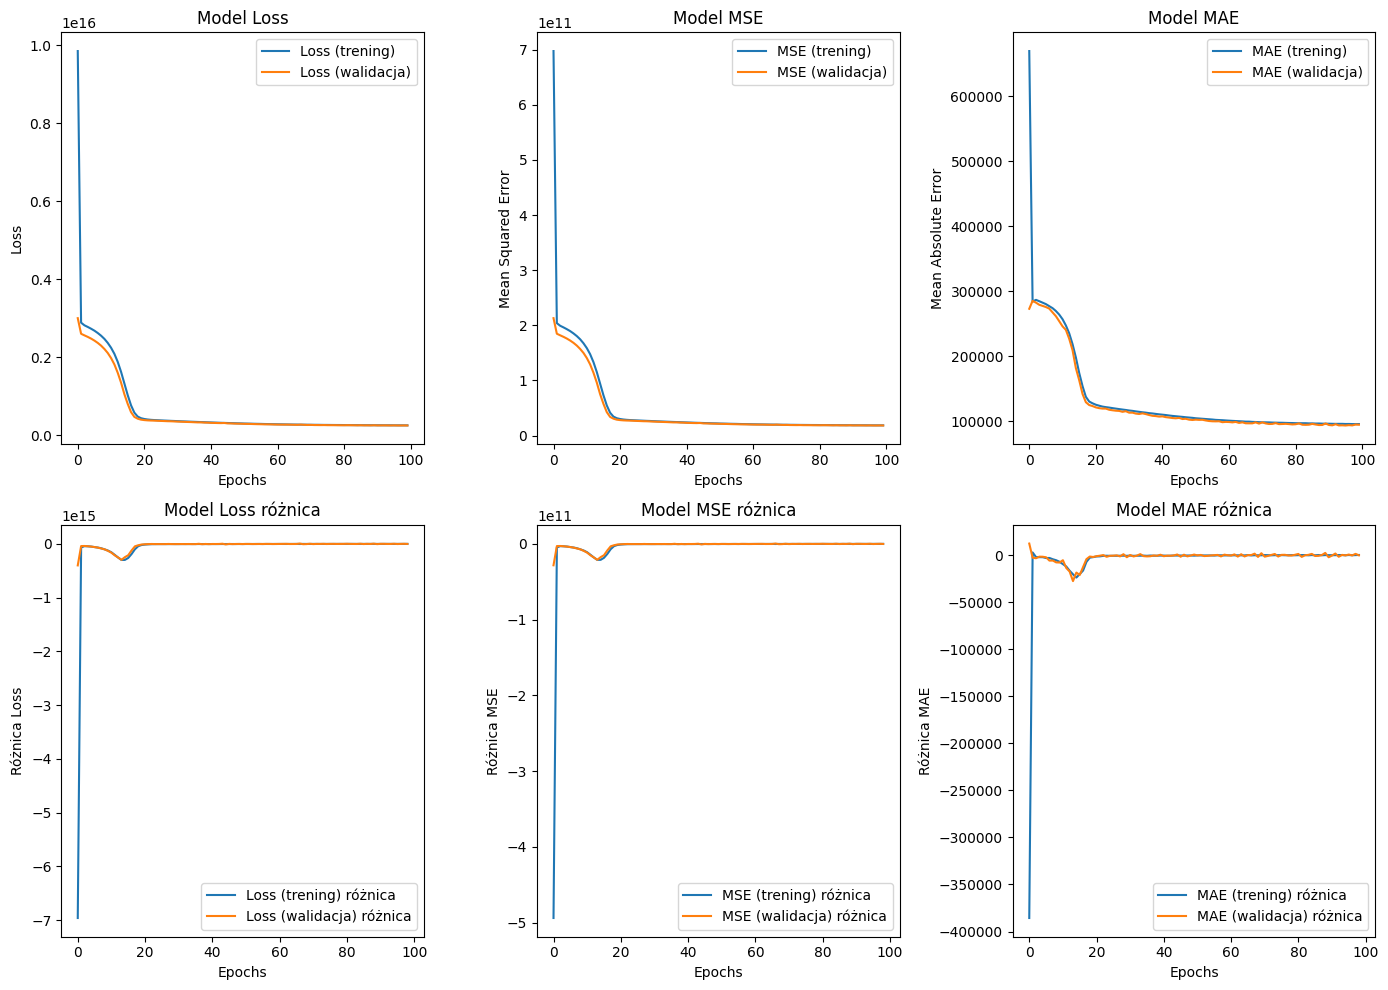

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sprawdź dostępne klucze w history.history
print(history.history.keys())

# Oblicz różnice między kolejnymi epokami dla metryk
loss_diff = np.diff(history.history['loss'])
val_loss_diff = np.diff(history.history['val_loss'])
mse_diff = np.diff(history.history['mse'])
val_mse_diff = np.diff(history.history['val_mse'])
mae_diff = np.diff(history.history['mae'])
val_mae_diff = np.diff(history.history['val_mae'])

# Wykres dla strat i metryk
plt.figure(figsize=(14, 10))

# Wykres Loss
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Loss (trening)')
plt.plot(history.history['val_loss'], label='Loss (walidacja)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Wykres MSE
plt.subplot(2, 3, 2)
plt.plot(history.history['mse'], label='MSE (trening)')
plt.plot(history.history['val_mse'], label='MSE (walidacja)')
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# Wykres MAE
plt.subplot(2, 3, 3)
plt.plot(history.history['mae'], label='MAE (trening)')
plt.plot(history.history['val_mae'], label='MAE (walidacja)')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Wykres różnic Loss
plt.subplot(2, 3, 4)
plt.plot(loss_diff, label='Loss (trening) różnica')
plt.plot(val_loss_diff, label='Loss (walidacja) różnica')
plt.title('Model Loss różnica')
plt.xlabel('Epochs')
plt.ylabel('Różnica Loss')
plt.legend()

# Wykres różnic MSE
plt.subplot(2, 3, 5)
plt.plot(mse_diff, label='MSE (trening) różnica')
plt.plot(val_mse_diff, label='MSE (walidacja) różnica')
plt.title('Model MSE różnica')
plt.xlabel('Epochs')
plt.ylabel('Różnica MSE')
plt.legend()

# Wykres różnic MAE
plt.subplot(2, 3, 6)
plt.plot(mae_diff, label='MAE (trening) różnica')
plt.plot(val_mae_diff, label='MAE (walidacja) różnica')
plt.title('Model MAE różnica')
plt.xlabel('Epochs')
plt.ylabel('Różnica MAE')
plt.legend()

plt.tight_layout()
plt.show()



In [18]:
def predict_price_tf(city, district, floor, rooms, sq, year, model):
    district_index = np.where(X.columns==district)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if district_index >= 0:
        x[district_index] = 1
    if city_index >= 0:
        x[city_index] = 1

    x = x.reshape(1, -1)
    return model.predict(x)[0][0]

In [19]:
print(predict_price_tf('Kraków','Nowa Huta', 2.0, 1.0, 34.55, 2022.0, split_model))

NameError: name 'split_model' is not defined

In [22]:
# import pickle
# with open('house_prices_ann_model.pickle', 'wb') as f:
#    pickle.dump(ann_model, f)

In [23]:
X_columns

Index(['floor', 'rooms', 'sq', 'year', 'Kraków', 'Poznań', 'Warszawa',
       'Bemowo', 'Białołęka', 'Bielany', 'Bieńczyce', 'Bieżanów-Prokocim',
       'Bronowice', 'Czyżyny', 'Dębniki', 'Grunwald', 'Grzegórzki', 'Jeżyce',
       'Krowodrza', 'Mistrzejowice', 'Mokotów', 'Nowa Huta', 'Nowe Miasto',
       'Ochota', 'Podgórze', 'Podgórze Duchackie', 'Praga-Południe',
       'Praga-Północ', 'Prądnik Biały', 'Prądnik Czerwony', 'Rembertów',
       'Stare Miasto', 'Swoszowice', 'Targówek', 'Ursus', 'Ursynów', 'Wawer',
       'Wesoła', 'Wilanów', 'Wilda', 'Wola', 'Wzgórza Krzesławickie', 'Włochy',
       'Zwierzyniec', 'Łagiewniki-Borek Fałęcki', 'Śródmieście', 'Żoliborz'],
      dtype='object')

In [24]:
import json
columns = {
    'data_columns': [col.lower() for col in X_columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [42]:
df4 = pd.read_csv("Houses_joined_city_district.csv", encoding = "utf-8")

In [43]:
df5 = remove_outliers(df4)

In [44]:
df4.shape

(37607, 10)

In [45]:
df5.shape

(29885, 10)

In [46]:
dummies = pd.get_dummies(df5.district)
df5 = pd.concat([df5,dummies],axis='columns')
df5.head(4)

,district,city,floor,price,rooms,sq,year,price_per_sq,update_date,offer_url,...,Warszawa_Targówek,Warszawa_Ursus,Warszawa_Ursynów,Warszawa_Wawer,Warszawa_Wesoła,Warszawa_Wilanów,Warszawa_Wola,Warszawa_Włochy,Warszawa_Śródmieście,Warszawa_Żoliborz
0,Kraków_Prądnik Biały,Kraków,4,749000.0,2,42.01,2023,17829.0,2024-07-04,https://www.otodom.pl/pl/oferta/2-pokoje-widok...,...,False,False,False,False,False,False,False,False,False,False
1,Kraków_Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/wyjatkowe-mies...,...,False,False,False,False,False,False,False,False,False,False
2,Kraków_Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,...,False,False,False,False,False,False,False,False,False,False
3,Kraków_Podgórze Duchackie,Kraków,8,655000.0,2,36.50,2023,17945.0,2024-07-04,https://www.otodom.pl/pl/oferta/gotowe-dwustro...,...,False,False,False,False,False,False,False,False,False,False


In [47]:
X = df5.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns

In [48]:
y = df5.price

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [50]:
print("Mean of scaled training data:", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled training data:", X_train_scaled.std(axis=0))


Mean of scaled training data: [-4.07162267e-17 -4.16078229e-17  2.86499581e-16 -1.58763564e-15
  4.57686052e-17  1.22297279e-16  1.54543342e-17 -1.84263216e-17
  6.41949268e-17 -8.32156458e-18  1.60487317e-17 -5.79537533e-17
 -2.49646937e-17 -1.78319241e-18  4.16078229e-18 -9.86699800e-17
 -1.42655393e-17  9.51035952e-18  3.26918609e-17 -5.08209837e-17
  4.16078229e-17  2.49646937e-17  8.12838540e-17  4.45798103e-17
 -6.98417027e-17  2.67478862e-17  4.99293875e-17  3.95274318e-17
  6.24117344e-18 -3.95274318e-17 -9.51035952e-18  5.55761635e-17
 -2.37758988e-18 -1.54543342e-17 -4.75517976e-17  5.23069774e-17
 -3.09086684e-17  1.11449526e-17 -2.85310786e-17 -3.15030659e-17
 -3.20974634e-17  6.53837217e-18  7.84604661e-17 -5.46845672e-17
 -2.43702963e-17  5.05237850e-18 -1.54543342e-17]
Standard deviation of scaled training data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [51]:
weights = [1 for i in range(len(X_train.columns))]
param_sample(4, "year")
cities_sample(2)

current_weights = np.array(weights) 
sample_weights = np.dot(X_train, current_weights)
sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)

# Definicja modelu artificial neural network
join_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
# Kompilowanie modelu

join_model.compile(optimizer=Nadam(), loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history = join_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

test_loss, test_mse, test_mae = join_model.evaluate(X_test_scaled, y_test)

# Sprawdzanie wyniku modelu
y_pred = join_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(r2)

Epoch 1/100


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2090340181868544.0000 - mae: 887888.8750 - mse: 995305717760.0000 - val_loss: 2015466419650560.0000 - val_mae: 876809.3125 - val_mse: 961458339840.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2026076062613504.0000 - mae: 872378.4375 - mse: 962377482240.0000 - val_loss: 1894844410626048.0000 - val_mae: 848538.1250 - val_mse: 903659978752.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1913383368523776.0000 - mae: 839220.7500 - mse: 905494528000.0000 - val_loss: 1634339477520384.0000 - val_mae: 783996.8125 - val_mse: 778868817920.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1686635401969664.0000 - mae: 771417.5000 - mse: 793205473280.0000 - val_loss: 1269283766140928.0000 - val_mae: 681794.1875 - val_mse: 604103245824.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1201870630551552.0000 - mae: 653100.0000 - mse: 568947703808.0000 - val_loss: 875479892492288.0000 

In [104]:
def predict_price_tf_new(city, district, floor, rooms, sq, year, model):
    district_index = np.where(X.columns==f'{city}_{district}')[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if district_index >= 0:
        x[district_index] = 1

    x = x.reshape(1, -1)
    return model.predict(x)[0][0]

In [37]:
print(predict_price_tf_new('Kraków','Stare Miasto', 3.0, 1.0, 44.55, 1936.0, join_model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
130561680.0


In [20]:
X = df5.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns
y = df5.price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

margin = 0.1 * y_train
y_train_lower = y_train - margin
y_train_upper = y_train + margin

margin_test = 0.1 * y_test
y_test_lower = y_test - margin_test
y_test_upper = y_test + margin_test

NameError: name 'df5' is not defined

In [19]:
from keras.models import Model
from keras.layers import Input, Dense

input_layer_join = Input(shape=(X_train.shape[1],))
dense1_join = Dense(64, activation='relu')(input_layer_join)
dense2_join = Dense(32, activation='relu')(dense1_join)

# Wyjście dla dolnej granicy przedziału
output_lower_join = Dense(1, name='lower_output_join')(dense2_join)

# Wyjście dla górnej granicy przedziału
output_upper_join = Dense(1, name='upper_output_join')(dense2_join)

# Kompilacja modelu z dwoma wyjściami
join_fork_model = Model(inputs=input_layer_join, outputs=[output_lower_join, output_upper_join])
join_fork_model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history_join = join_fork_model.fit(X_train_scaled, [y_train_lower, y_train_upper], epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

# Ewaluacja modelu
test_loss_join, test_mse_join, test_mae_join = join_fork_model.evaluate(X_test_scaled, [y_test_lower, y_test_upper])

# Sprawdzanie wyniku modelu
y_pred_lower_join, y_pred_upper_join = join_fork_model.predict(X_test_scaled)

# R^2 dla dolnych i górnych granic
r2_lower_join = r2_score(y_test_lower, y_pred_lower_join)
r2_upper_join = r2_score(y_test_upper, y_pred_upper_join)
print(f"R^2 dla dolnych granic (join_fork_model): {r2_lower_join}")
print(f"R^2 dla górnych granic (join_fork_model): {r2_upper_join}")


NameError: name 'y_train_lower' is not defined

In [20]:
X = df3.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns
y = df3.price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

margin = 0.1 * y_train
y_train_lower = y_train - margin
y_train_upper = y_train + margin

margin_test = 0.1 * y_test
y_test_lower = y_test - margin_test
y_test_upper = y_test + margin_test

In [23]:
from keras.models import Model
from keras.layers import Input, Dense

weights = [1 for i in range(len(X_train.columns))]
param_sample(4, "year")
cities_sample(2)

current_weights = np.array(weights) 
sample_weights = np.dot(X_train, current_weights)
sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)

input_layer_split = Input(shape=(X_train.shape[1],))
dense1_split = Dense(64, activation='relu')(input_layer_split)
dense2_split = Dense(32, activation='relu')(dense1_split)

# Wyjście dla dolnej granicy przedziału
output_lower_split = Dense(1, name='lower_output_split')(dense2_split)

# Wyjście dla górnej granicy przedziału
output_upper_split = Dense(1, name='upper_output_split')(dense2_split)

# Kompilacja modelu z dwoma wyjściami
split_fork_model = Model(inputs=input_layer_split, outputs=[output_lower_split, output_upper_split])
split_fork_model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history_split = split_fork_model.fit(X_train_scaled, [y_train_lower, y_train_upper], epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

# Ewaluacja modelu
test_loss_split, test_mse_split, test_mae_split = split_fork_model.evaluate(X_test_scaled, [y_test_lower, y_test_upper])

# Sprawdzanie wyniku modelu
y_pred_lower_split, y_pred_upper_split = split_fork_model.predict(X_test_scaled)

# R^2 dla dolnych i górnych granic
r2_lower_split = r2_score(y_test_lower, y_pred_lower_split)
r2_upper_split = r2_score(y_test_upper, y_pred_upper_split)
print(f"R^2 dla dolnych granic (split_fork_model): {r2_lower_split}")
print(f"R^2 dla górnych granic (split_fork_model): {r2_upper_split}")


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 16500888541593600.0000 - lower_output_split_mse: 815843508224.0000 - upper_output_split_mae: 978802.1250 - val_loss: 15687982228963328.0000 - val_lower_output_split_mse: 776359444480.0000 - val_upper_output_split_mae: 963891.3125
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16044026427867136.0000 - lower_output_split_mse: 791981916160.0000 - upper_output_split_mae: 968253.7500 - val_loss: 14529442718154752.0000 - val_lower_output_split_mse: 712647049216.0000 - val_upper_output_split_mae: 928534.5000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14391336971010048.0000 - lower_output_split_mse: 701516021760.0000 - upper_output_split_mae: 917242.8750 - val_loss: 12076736145522688.0000 - val_lower_output_split_mse: 578694479872.0000 - val_upper_output_split_mae: 847763.2500
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12041366016098304.0000 - lower_output_split_mse: 569759367168.0000

In [ ]:
def predict_price_tf_fork_new(city, district, floor, rooms, sq, year, model):
    X = df5.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
    try:
        district_index = np.where(X.columns == f'{city}_{district}')[0][0]
    except IndexError:
        district_index = -1

    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year

    if district_index >= 0:
        x[district_index] = 1

    x = x.reshape(1, -1)

    preds = model.predict(x)
    lower_pred = preds[0][0]
    upper_pred = preds[1][0]

    return lower_pred, upper_pred

In [ ]:
def predict_price_tf_fork(city, district, floor, rooms, sq, year, model):
    X = df3.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
    try:
        district_index = np.where(X.columns==district)[0][0]
        city_index = np.where(X.columns==city)[0][0]
    except IndexError:
        district_index = -1
        city_index = -1

    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year

    if district_index >= 0:
        x[district_index] = 1
    if city_index >= 0:
        x[city_index] = 1

    x = x.reshape(1, -1)

    preds = model.predict(x)
    lower_pred = preds[0][0]
    upper_pred = preds[1][0]

    return lower_pred, upper_pred

In [132]:
print(predict_price_tf_fork_new('Kraków','Stare Miasto', 3.0, 2.0, 44.55, 1936.0, join_fork_model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
(array([1.1812602e+08], dtype=float32), array([1.443922e+08], dtype=float32))


In [130]:
# import pickle
# with open('house_prices_fork_ann_model.pickle', 'wb') as f:
#    pickle.dump(ann_model, f)

In [ ]:
print(predict_price_tf_fork('Kraków','Stare Miasto', 3.0, 2.0, 44.55, 1936.0, split_fork_model))